# Chapter 2 exercises


## Problem 1

Table B.1 gives data concerning the performance of the 26 National Football League teams in 1976. It is suspected that the number of yards gained rushing by opponents ($x_8$) has an effect on the number of games won by a team ($y$).

1. Fit a simple linear regression model relating games won $y$ to yards gained rushing by opponents $x_8$.


In [21]:
import linear_regression as lr
import pandas as pd

data = pd.read_csv("datasets/b1.csv")

x_data = data["x8"].values
y_data = data["y"].values

model1 = lr.SimpleLinearRegression(x_data, y_data)
print(model1)

Simple linear regression model trained on 28 observations.
The estimated parameters are: 
   - b0: 21.7883
   - b1: -0.0070



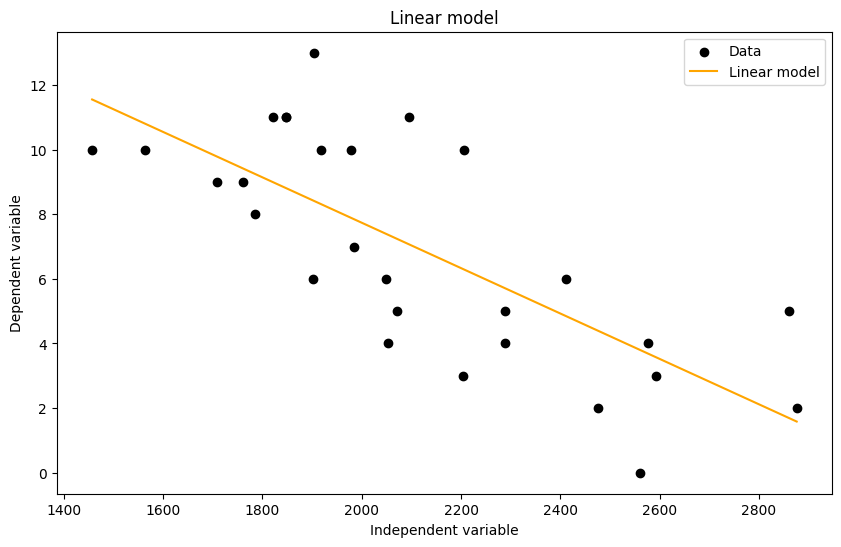

In [22]:
model1.plot_linear_model_line()

2. Construct the analysis-of-variance table and test for significance of regression.

Analysis of variance identity breakdown:
  - total sum of squares (SST): 326.96,
  - regression sum of squares (SSR): 178.09,
  - residual sum of squares (SSRes): 148.87,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 31.10
The 0.95 quantile of the F-distribution with 1 and 26 degrees of freedom is: 4.23
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


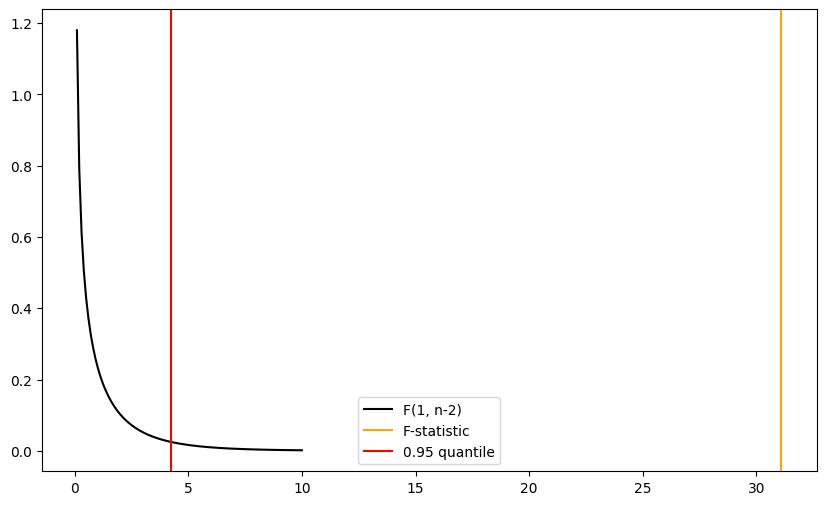

In [2]:
model1.analysis_of_variance()

3. Find a 95% CI on the slope.

In [3]:
slope_ll, slope_ul = model1.regressor_parameter_confidence_interval(j = 1, alpha = 0.05)
print("The 95% confidence interval for the slope parameter b1 is ({:.4f}, {:.4f})".format(slope_ll, slope_ul))

The 95% confidence interval for the slope parameter b1 is (-0.0096, -0.0044)


4. What percent of the total variability in $y$ is explained by this model?

In [4]:
r2 = model1.coefficient_of_determination()

print("The R^2 value for the model is {:.4f}".format(r2))

The R^2 value for the model is 0.5447


5. Find a 95% CI on the mean number of games won if opponents' yards rushing is limited to 2000 yards.

In [5]:
from scipy.stats import t

mean_x = sum(x_data) / len(x_data)
x0 = 2000

c = model1.MSRes * (1 / len(x_data) + (x0 - mean_x) ** 2 / model1.Sxx)
mean_response = model1.predict(x0)
boundary = t.ppf(0.975, df = len(x_data) - 2)

ll = mean_response - boundary * pow(c, 0.5)
ul = mean_response + boundary * pow(c, 0.5)

print("The 95% prediction interval for the mean response at x0 = 2000 is ({:.4f}, {:.4f})".format(ll, ul))

The 95% prediction interval for the mean response at x0 = 2000 is (6.7658, 8.7103)


## Problem 2

Suppose we would like to use the model developed in Problem 2.1 to predict the number of games a team will win if it can limit opponents' yards rushing to 1800 yards. Find a point estimate of the number of games won when $x_8 = 1800$. Find a 90% prediction interval on the number of games won.

In [6]:
x = 1800
point_estimate = model1.predict(x)

ll, ul = model1.prediction_confidence_interval(x, alpha = 0.1)

print("If the value of x is limited to 1800, the point estimate for the mean response is {:.4f}".format(point_estimate))
print("The 90% confidence interval for the prediction at x = 1800 is ({:.4f}, {:.4f})".format(ll, ul))

If the value of x is limited to 1800, the point estimate for the mean response is 9.1431
The 90% confidence interval for the prediction at x = 1800 is (4.9364, 13.3497)


## Problem 3

Table B.2 presents data collected during a solar energy project at Georgia Tech.
1. Fit a simple linear regression model relating total heat flux $y$ (kilowatts) to the radial deflection of the deflected rays $x_4$ (milliradians).

In [7]:
data = pd.read_csv("datasets/b2.csv")

x_data = data["x4"].values
y_data = data["y"].values

model2 = lr.SimpleLinearRegression(x_data, y_data)
print(model2)

Simple linear regression model trained on 29 observations.
The estimated parameters are: 
   - b0: 607.1033
   - b1: -21.4025



2. Construct the analysis-of-variance table and test for significance of regression.

Analysis of variance identity breakdown:
  - total sum of squares (SST): 14681.93,
  - regression sum of squares (SSR): 10578.68,
  - residual sum of squares (SSRes): 4103.24,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 69.61
The 0.95 quantile of the F-distribution with 1 and 27 degrees of freedom is: 4.21
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


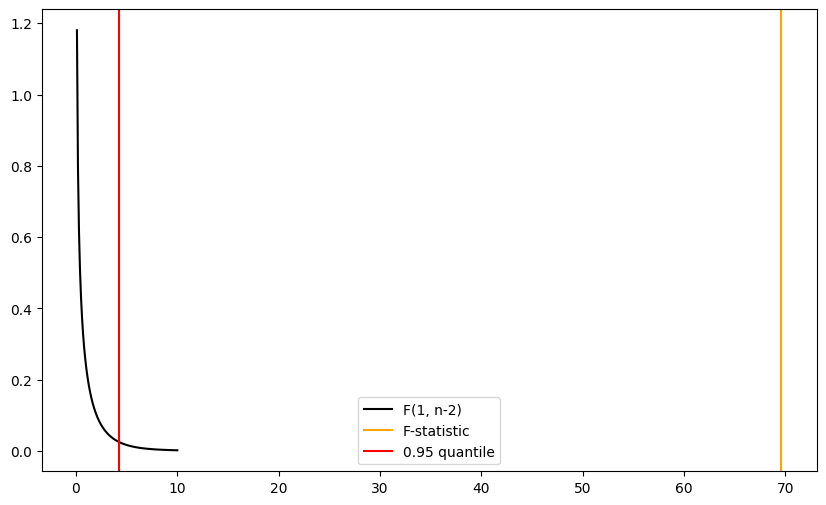

In [8]:
model2.analysis_of_variance()

3. Find a 99% CI on the slope.

In [9]:
slope_ll, slope_ul = model2.regressor_parameter_confidence_interval(j = 1, alpha = 0.01)

print("The 99% confidence interval for the slope parameter b1 is ({:.4f}, {:.4f})".format(slope_ll, slope_ul))

The 99% confidence interval for the slope parameter b1 is (-28.5100, -14.2950)


4. Calculate $R^2$.

In [10]:
print("The R2 value for the model is {:.4f}".format(model2.coefficient_of_determination()))

The R2 value for the model is 0.7205


5. Find a 95% CI on the mean heat flux when the radial deflection is 16.5 milliradians.

In [11]:
x0 = 16.5

mean_response_ll, mean_response_ul = model2.mean_response_confidence_interval(x0, alpha = 0.05)
print("The 95% confidence interval for the mean response at x0 = 16.5 is ({:.4f}, {:.4f})".format(mean_response_ll, mean_response_ul))

The 95% confidence interval for the mean response at x0 = 16.5 is (249.1468, 258.7787)


## 2.4

Table B.3 presents data on the gasoline mileage performance of 32 different automobiles.
1. Fit a simple linear regression model relating gasoline mileage $y$ (miles per gallon) to engine displacement $x_1$ (cubic inches).

In [12]:
data = pd.read_csv("datasets/b3.csv")

x_data = data["x1"].values
y_data = data["y"].values

model = lr.SimpleLinearRegression(x_data, y_data)
print(model)

Simple linear regression model trained on 32 observations.
The estimated parameters are: 
   - b0: 32.1748
   - b1: -0.0400



2. Construct the analysis-of-variance table and test for significance of regression.

Analysis of variance identity breakdown:
  - total sum of squares (SST): 1301.11,
  - regression sum of squares (SSR): 679.52,
  - residual sum of squares (SSRes): 621.59,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 32.80
The 0.95 quantile of the F-distribution with 1 and 30 degrees of freedom is: 4.17
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


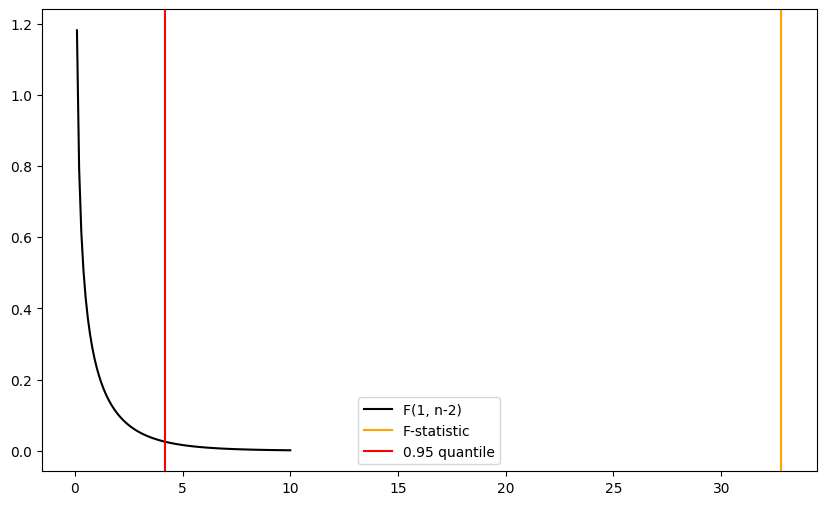

In [13]:
model.analysis_of_variance()

3. What percent of the total variability in gasoline mileage is accounted for by the linear relationship with engine displacement?

In [14]:
r2 = model.coefficient_of_determination()
print("The R2 value for the model is {:.4f}".format(r2))

The R2 value for the model is 0.5223


4. Find a 95% CI on the mean gasoline mileage if the engine displacement is $275 in^3$?

In [15]:
x0 = 275

mean_response_ll, mean_response_ul = model.mean_response_confidence_interval(x0, alpha = 0.05)
print("The 95% confidence interval for the mean response at x0 = 275 is ({:.4f}, {:.4f})".format(mean_response_ll, mean_response_ul))

The 95% confidence interval for the mean response at x0 = 275 is (19.5257, 22.8241)


5. Suppose that we wish to predict the gasoline mileage obtained from a car with a $275 in^3$ engine. Give a point estimate of mileage. Find a 95% prediction interval on the mileage.

In [16]:
prediction_ll, prediction_ul = model.prediction_confidence_interval(x0, alpha = 0.05)
print("The 95% prediction interval for the response at x0 = 275 is ({:.4f}, {:.4f})".format(prediction_ll, prediction_ul))

The 95% prediction interval for the response at x0 = 275 is (11.7335, 30.6162)


6. Compare the two intervals obtained in parts $d$ and $e$. Explain the difference between them. Which one is wider, and why?

In [17]:
length_interval_mean_response = mean_response_ul - mean_response_ll
length_interval_prediction = prediction_ul - prediction_ll

longer_interval = "MEAN RESPONSE" if length_interval_mean_response > length_interval_prediction else "PREDICTION"

print("The length of the mean response interval (95%) is {:.4f}".format(length_interval_mean_response))
print("The length of the prediction interval (95%) is {:.4f}".format(length_interval_prediction))
print("The longer interval is {}".format(longer_interval))

The length of the mean response interval (95%) is 3.2984
The length of the prediction interval (95%) is 18.8827
The longer interval is PREDICTION


# Visualization

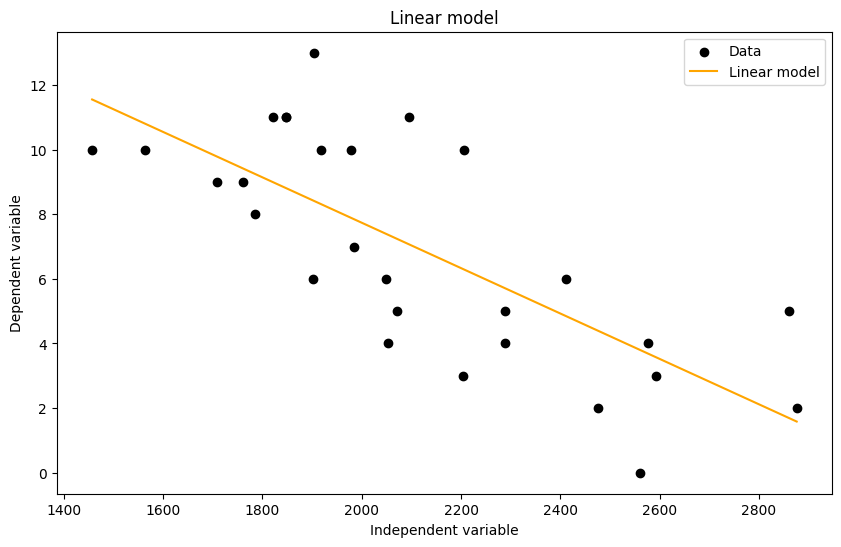

In [18]:
import linear_regression as lr
import pandas as pd

data = pd.read_csv("datasets/b1.csv")

x_data = data["x8"].values
y_data = data["y"].values

model1 = lr.SimpleLinearRegression(x_data, y_data)
model1.plot_linear_model_line()

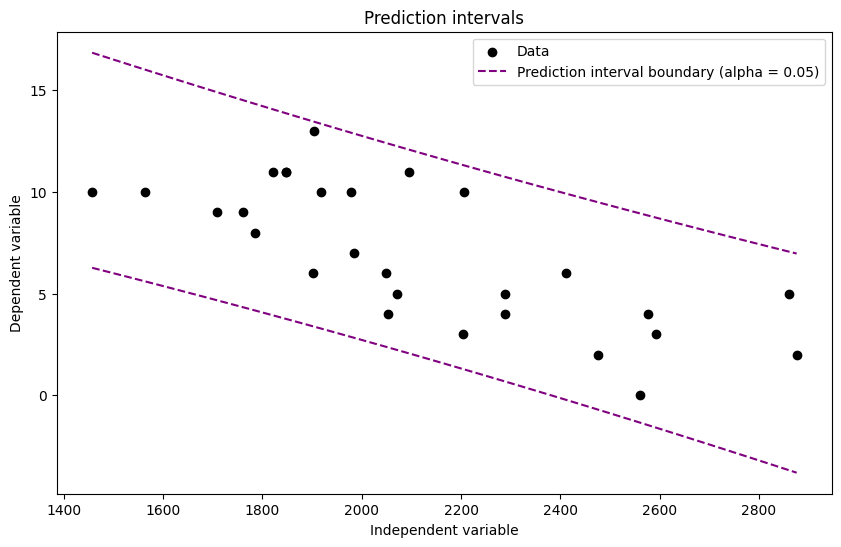

In [19]:
model1.plot_prediction_confidence_area()

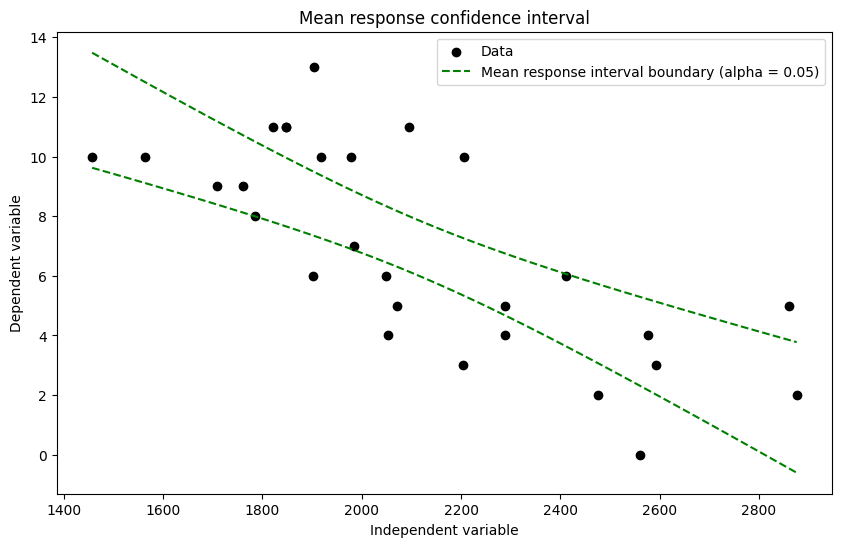

In [20]:
model1.plot_mean_response_confidence_area()